## Import modules

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import combinations
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [ ]:
# Read all the sales files and merge them into a single csv file

files = [file for file in os.listdir("./Sales_Data/")]

all_data = pd.DataFrame()
for file in files:
    data = pd.read_csv("./Sales_Data/"+file)
    all_data = pd.concat([all_data, data])

all_data.to_csv("All_Sales.csv", index=False)

In [ ]:
df = pd.read_csv("All_Sales.csv")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [ ]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## Clean the data

In [ ]:
# Drop NaN values

# NaN rows
df[df.isna().any(axis=1)]

# Count of NaN rows
df.isna().sum()

# Drop NaN rows
df = df.dropna(how="all")

In [ ]:
# Find the string values ("Or") in Order Date and filter the dataframe

df = df[df["Order Date"].str[0:2] != "Or"]

In [ ]:
# Convert columns data types

df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df["Price Each"] = pd.to_numeric(df["Price Each"])

In [ ]:
# Check the data types again

df.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

## Augment data with additional columns

In [ ]:
# Add "Month" column

df["Month"] = df["Order Date"].str[0:2]
df["Month"] = df["Month"].astype("int32")

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [ ]:
# Add "Sales" column

df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [ ]:
# Add "City" column with apply() function

def getCity(address):
    return address.split(", ")[1]

def getState(address):
    return address.split(", ")[2].split(" ")[0]

df["City"] = df["Purchase Address"].apply(lambda x: f"{getCity(x)} {getState(x)}")

# Alternatives:
# df["City"] = df["Purchase Address"].apply(lambda x: x.split(", ")[1])
# df["City"] = df["Purchase Address"].str.split(", ").str[1]

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


## Question 2: What was the best month for sales? How much was earned that month?

In [ ]:
df.groupby("Month").sum()

# December was the best month for sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


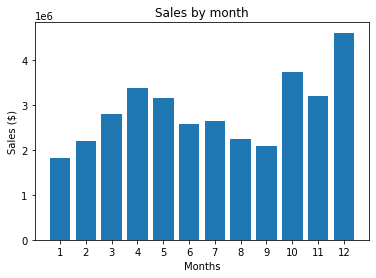

In [ ]:
# Visualization
months = range(1, 13)
sales = df.groupby("Month").sum()["Sales"]

plt.bar(months, sales)
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales ($)")
plt.title("Sales by month")
plt.show()

## Question 2: What city had the highest number of sales

In [ ]:
df["City"].nunique()

10

In [ ]:
df.groupby("City").sum()["Sales"].sort_values(ascending=False)

# San Francisco had the highest number of sales

City
San Francisco CA    8262203.91
Los Angeles CA      5452570.80
New York City NY    4664317.43
Boston MA           3661642.01
Atlanta GA          2795498.58
Dallas TX           2767975.40
Seattle WA          2747755.48
Portland OR         1870732.34
Austin TX           1819581.75
Portland ME          449758.27
Name: Sales, dtype: float64

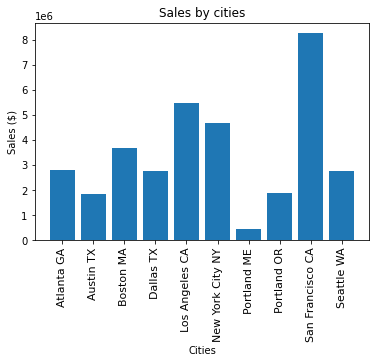

In [ ]:
# Visualization
cities = [city for city, df in df.groupby("City")]
sales = df.groupby("City").sum()["Sales"]

plt.bar(cities, sales)
plt.xticks(cities, rotation="vertical", size=11)
plt.xlabel("Cities")
plt.ylabel("Sales ($)")
plt.title("Sales by cities")
plt.show()

## Question 3: What time should advertisements be displayed to maximize likelihood of customer's buying product?

In [ ]:
%timeit df["Order Date"] = pd.to_datetime(df["Order Date"], format="%m/%d/%y %H:%M")
# format param: in order to decrease the execution time of the function

3.86 ms ± 308 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [ ]:
# Number of orders for each hour

df.groupby(["Hour"]).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Minute
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


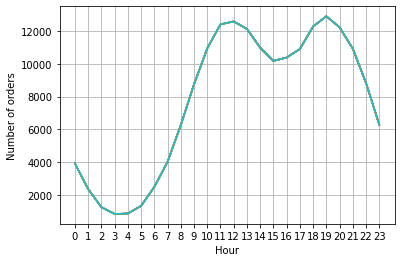

In [ ]:
# Visualization
hours = [hour for hour, df in df.groupby("Hour")]

plt.plot(hours, df.groupby(["Hour"]).count())
plt.xticks(hours)
plt.xlabel("Hour")
plt.ylabel("Number of orders")
plt.grid()
plt.show()

# Around 12 or 19

## Question 4: What products are most often sold together?

In [ ]:
# Find the duplicated rows for "Order ID"

data = df[df["Order ID"].duplicated(keep=False)]

# Create a new column to store the product names that shares the same Order ID

data["Orders Grouped"] = data.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))

data.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Orders Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17,0,"AAA Batteries (4-pack), Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17,0,"AAA Batteries (4-pack), Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11,7,"Lightning Charging Cable, USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11,7,"Lightning Charging Cable, USB-C Charging Cable"


In [ ]:
# Drop the duplicates now to find out which products were sold in the same order
 
data = data[["Order ID", "Orders Grouped"]].drop_duplicates()

data.head(10)

,Order ID,Orders Grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
129,176681,"Apple Airpods Headphones, ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones, AAA Batteries (4-p..."
189,176739,"34in Ultrawide Monitor, Google Phone"
225,176774,"Lightning Charging Cable, USB-C Charging Cable"
233,176781,"iPhone, Lightning Charging Cable"


In [ ]:
counter = Counter()

for row in data["Orders Grouped"]:
    row_list = row.split(", ")
    counter.update(Counter(combinations(row_list, 2))) # param 2 is for listing 2 different products. 3 will be for listing 3 different products etc.

for key, value in counter.most_common(10):
    print(key, value)

# Products that are most often sold together:

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Question 5: What products sold the most and why?

In [ ]:
product_data = df.groupby("Product")

quantity_ordered = product_data.sum()["Quantity Ordered"]

quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

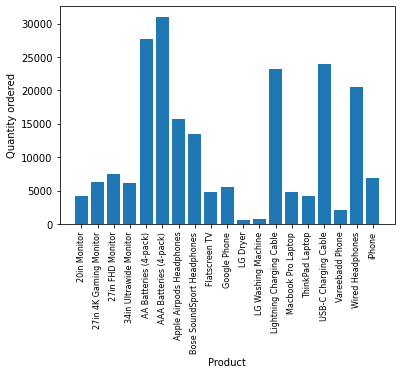

In [ ]:
# Visualization
products = [product for product, data in product_data]

plt.bar(products, quantity_ordered)
plt.ylabel("Quantity ordered")
plt.xlabel("Product")
plt.xticks(products, rotation="vertical", size=8)
plt.show()

# AAA Batteries (4-pack) sold the most

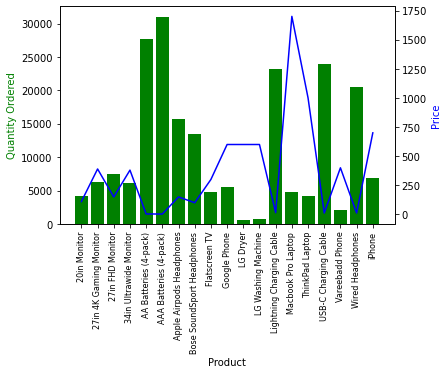

In [ ]:
# Visualization to compare prices and order quantity
prices = df.groupby("Product").mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color="g")
ax2.plot(products, prices, color="b")

ax1.set_xlabel("Product")
ax1.set_ylabel("Quantity Ordered", color="g")
ax2.set_ylabel("Price", color="b")

ax1.set_xticklabels(products, rotation="vertical", size=8)

plt.show()

# Product prices are a factor in product sales